# Pre-Class 8.2

In [38]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

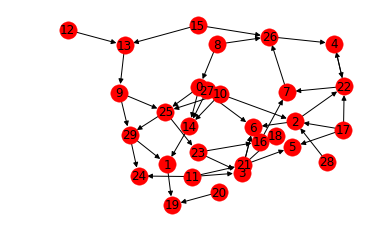

In [50]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
labels = nx.draw_networkx_labels(g, pos=nx.kamada_kawai_layout(g))
nx.draw(g, pos=nx.kamada_kawai_layout(g))


In [216]:
def surf_the_web(g, steps, alpha=0.85):
    rank = np.zeros(len(g.nodes))
    current_node = rd.choice(list(g.nodes))
    for _ in range(steps):
        rank[current_node] += 1
        if np.random.uniform(0, 1) > alpha:
            current_node = rd.choice(list(g.nodes))
        else: 
            if len(list(g.neighbors(current_node))) > 0:
                current_node = rd.choice(list(g.neighbors(current_node)))
            else:
                current_node = rd.choice(list(g.nodes))
    rank /= steps
    return rank
        
page_rank = np.array(list(nx.pagerank(g).values()))
surf_rank = surf_the_web(g, 100000)
print(page_rank)
print(surf_rank)

[0.01321915 0.04305615 0.02241844 0.02076357 0.1519409  0.01527804
 0.04357199 0.08868962 0.00927659 0.02721522 0.00927659 0.00927659
 0.00927659 0.02110426 0.0235355  0.00927659 0.0181352  0.00927659
 0.01264967 0.05375946 0.00927659 0.01190496 0.15057446 0.02084377
 0.02567933 0.02721687 0.09254383 0.00927659 0.00927659 0.03241025]
[0.01328 0.04321 0.02237 0.02079 0.15101 0.01512 0.044   0.08798 0.00936
 0.02775 0.00908 0.009   0.00939 0.02121 0.02383 0.00979 0.01789 0.00967
 0.01237 0.05431 0.00982 0.01172 0.15017 0.0209  0.02582 0.02657 0.09249
 0.00941 0.00929 0.0324 ]


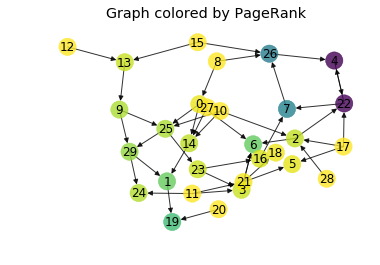

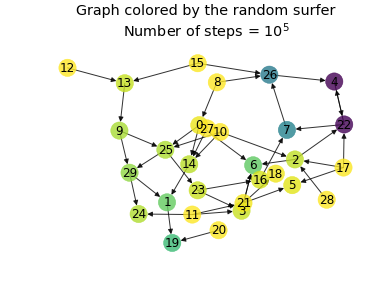

In [218]:
plt.figure(1)
plt.title("Graph colored by PageRank")
labels = nx.draw_networkx_labels(g, pos=nx.kamada_kawai_layout(g))
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color=-page_rank, alpha=0.8)
plt.figure(2)
plt.title("Graph colored by the random surfer\nNumber of steps = $10^5$")
labels = nx.draw_networkx_labels(g, pos=nx.kamada_kawai_layout(g))
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color=-surf_rank, alpha=0.8)

plt.show()

In [206]:
n = 8
steps_to_try = np.logspace(1, n, n)
errors = []

for i in range(n):
    print(i, int(steps_to_try[i]))
    %time temp_surf = surf_the_web(g, int(steps_to_try[i]))
    errors.append(page_rank-temp_surf)


0 10
CPU times: user 248 µs, sys: 113 µs, total: 361 µs
Wall time: 270 µs
1 100
CPU times: user 1.44 ms, sys: 832 µs, total: 2.27 ms
Wall time: 1.58 ms
2 1000
CPU times: user 9.85 ms, sys: 3.56 ms, total: 13.4 ms
Wall time: 11.3 ms
3 10000
CPU times: user 72.6 ms, sys: 30.6 ms, total: 103 ms
Wall time: 78.2 ms
4 100000
CPU times: user 357 ms, sys: 18.2 ms, total: 375 ms
Wall time: 378 ms
5 1000000
CPU times: user 3.15 s, sys: 22.4 ms, total: 3.17 s
Wall time: 3.21 s
6 10000000
CPU times: user 31.9 s, sys: 148 ms, total: 32 s
Wall time: 32.3 s
7 100000000
CPU times: user 5min 34s, sys: 2.29 s, total: 5min 36s
Wall time: 5min 51s


In [207]:
print([abs(np.mean(err)) for err in errors])

[4.625929269271485e-18, 4.799401616869166e-18, 3.23815048849004e-18, 3.960951936813709e-18, 4.5102810375396986e-18, 3.7007434154171884e-18, 4.394632805807911e-18, 3.353798720221827e-18]


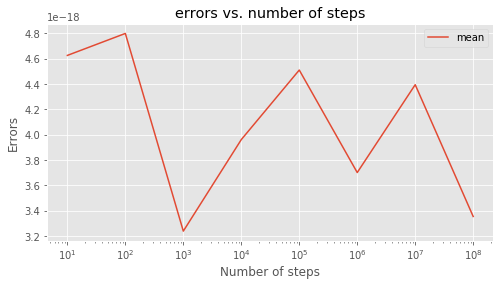

In [208]:
plt.figure(figsize=(8,4))
plt.plot(steps_to_try, [abs(np.mean(err)) for err in errors], label="mean")
plt.title("errors vs. number of steps")
plt.xlabel("Number of steps")
plt.ylabel("Errors")
plt.xscale("log")
plt.legend()
plt.show()